# HEALTH PLOT

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



Initialized empty Git repository in C:/Users/johnf/Datathon/.git/


In [120]:
consumer_df = pd.read_csv('ConsumerData.csv')
consumer_df.columns

Index(['RecordID', 'MAK', 'BaseMak', 'Address', 'City', 'State', 'Zipcode',
       'Latitude', 'Longitude', 'OwnerRenter', 'HomePurchaseDate',
       'Charitable', 'Health', 'Political', 'Religious', 'Veteran',
       'MaritalStatus', 'SingleParent', 'NumberOfChildren', 'GrandChildren',
       'HouseholdSize', 'CatOwner', 'DogOwner', 'NetWorth', 'CreditCardUser',
       'VehicleKnownOwnedNumber', 'SelfImprovement', 'MusicCollector',
       'MovieCollector', 'Photography', 'AutoWork', 'Fishing', 'CampingHiking',
       'HuntingShooting', 'Gardening', 'EnvironmentalIssues',
       'HomeImprovement', 'HomeImprovementDIY', 'OutdoorsGrouping',
       'InvestmentsForeign', 'BeautyCosmetics', 'TVCable',
       'WirelessCellularPhoneOwner', 'EducationOnline'],
      dtype='object')

In [121]:
consumer_df['Health'] = consumer_df['Health'].apply(lambda x: 1 if x == 'Y' else 0)


# Data Preprocessing

In [122]:
non_predictor_columns = ['SelfImprovement', 'CreditCardUser', 'InvestmentsForeign','CatOwner', 'DogOwner', 'BeautyCosmetics', 'RecordID', 'MAK', 'BaseMak', 'Address', 'State',  'HomePurchaseDate', 'VehicleKnownOwnedNumber', 'WirelessCellularPhoneOwner', 'Veteran', 'SingleParent', 'GrandChildren', 'MusicCollector', 'EnvironmentalIssues' ,'EducationOnline']
consumer_df_new = consumer_df.drop(columns = non_predictor_columns)
consumer_df_new_1 = consumer_df_new.dropna()

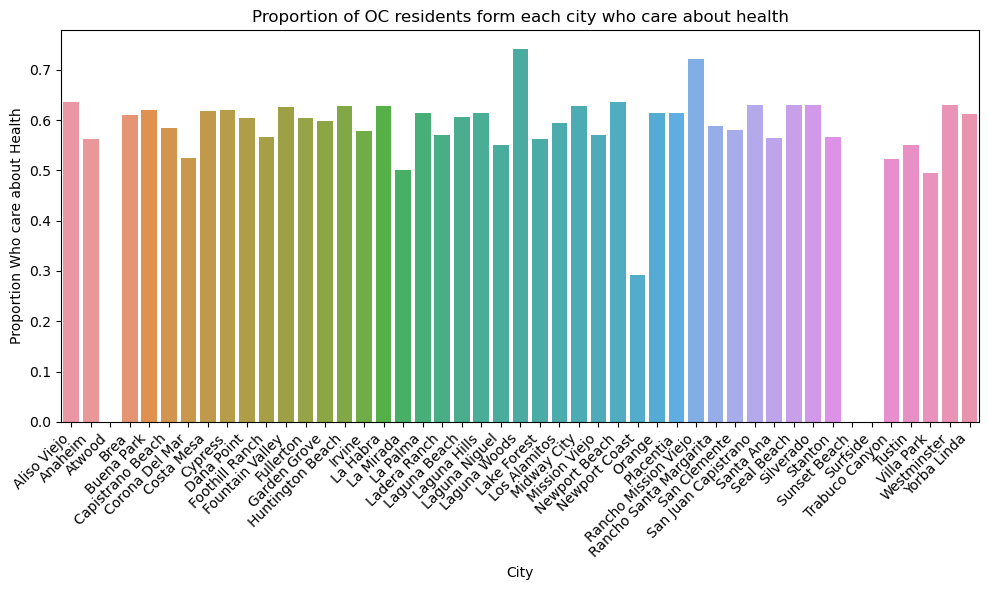

City
Aliso Viejo               0.635452
Anaheim                   0.562194
Atwood                    0.000000
Brea                      0.611002
Buena Park                0.620104
Capistrano Beach          0.584000
Corona Del Mar            0.525000
Costa Mesa                0.618656
Cypress                   0.619666
Dana Point                0.604743
Foothill Ranch            0.566176
Fountain Valley           0.626126
Fullerton                 0.603792
Garden Grove              0.597484
Huntington Beach          0.627759
Irvine                    0.577841
La Habra                  0.628099
La Mirada                 0.500000
La Palma                  0.614865
Ladera Ranch              0.570552
Laguna Beach              0.606667
Laguna Hills              0.614545
Laguna Niguel             0.550847
Laguna Woods              0.741259
Lake Forest               0.562594
Los Alamitos              0.594017
Midway City               0.627907
Mission Viejo             0.570085
Newport Beach  

In [146]:
count = consumer_df_new_1.groupby('City').agg({'Health': 'count'})
                                                #, 'proportion': lambda x: x.sum() / x.count()})
summ = consumer_df_new_1.groupby('City').agg({'Health': 'sum'})

sum_and_count = pd.concat([count,summ],axis=1)
sum_and_count.columns = ['count','sum']
sum_and_count['prop'] = sum_and_count['sum']/ sum_and_count['count']

sum_and_count
plt.figure(figsize=(10, 6))
ax = sns.barplot(x= sum_and_count.index,y=sum_and_count['prop'])
ax.set(xlabel ="City", ylabel = "Proportion Who care about Health", title ='Proportion of OC residents form each city who care about health')
plt.xticks(rotation=45, ha = 'right')
plt.tight_layout()
plt.show()


sum_and_count.index
sum_and_count['prop']

In [124]:
def color_grad(value):
    blue = (0, 0, 1)
    
    # Red color (0.8)
    red = (1, 0, 0)
    
    # Interpolate between blue and red based on the value
    r = blue[0] + (red[0] - blue[0]) * ((value - 0.29) / (0.8 - 0.29))
    g = blue[1] + (red[1] - blue[1]) * ((value - 0.29) / (0.8 - 0.29))
    b = blue[2] + (red[2] - blue[2]) * ((value - 0.29) / (0.8 - 0.29))
    
    return (r, g, b)

# MORE INLAND LESS WEALTHY 

C:\Users\johnf\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:43: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



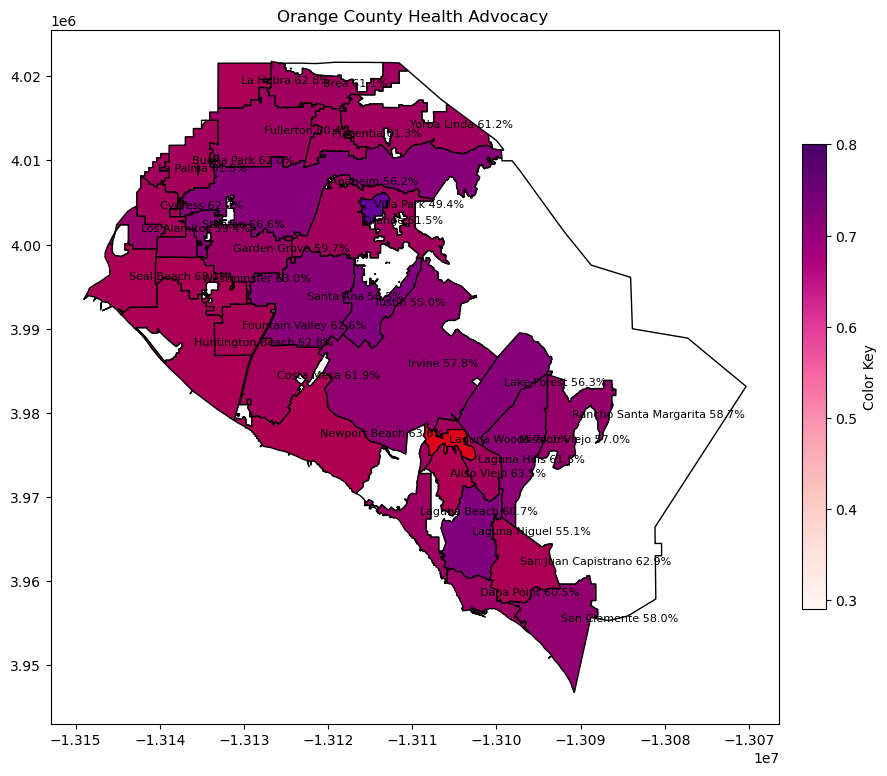

In [155]:
    import geopandas as gpd
    import matplotlib.pyplot as plt
    import matplotlib.colors as mcolors

    # Read the shapefile
    orange_county = gpd.read_file('City.shp')

    # Plot the map
    fig, ax = plt.subplots(figsize=(10, 10))
    colors = [color_grad(sum_and_count['prop'][city])  if city in sum_and_count.index else 'white' for city in orange_county['District']]

    orange_county.plot(ax=ax, color=colors, edgecolor='black')
    
    
#     norm = mcolors.Normalize(vmin=0, vmax=0.8)  # Adjust vmin and vmax according to your data range
#     sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
#     sm.set_array([])
#     plt.colorbar(sm, ax=ax, orientation='vertical', label='Color Key')
    
    norm = mcolors.Normalize(vmin=0.29, vmax=0.8)  # Adjust vmin and vmax according to your data range
    cmap = plt.cm.get_cmap('RdPu_r').reversed()  # Reverse the colormap to go from purple to red
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])

    ax.set_title('Orange County Health Advocacy ')

    # Add city names
    for x, y, label in zip(orange_county.geometry.centroid.x, orange_county.geometry.centroid.y, orange_county['District']):
        ax.text(x, y, label + ' '+ str('{:.1%}'.format(sum_and_count['prop'][label])) if label in sum_and_count.index else '', fontsize=8)

    # Add colorbar
    cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.03, pad=0.03)
    cbar.set_label('Color Key')
    
    plt.show()




<AxesSubplot:xlabel='NetWorth', ylabel='Count'>

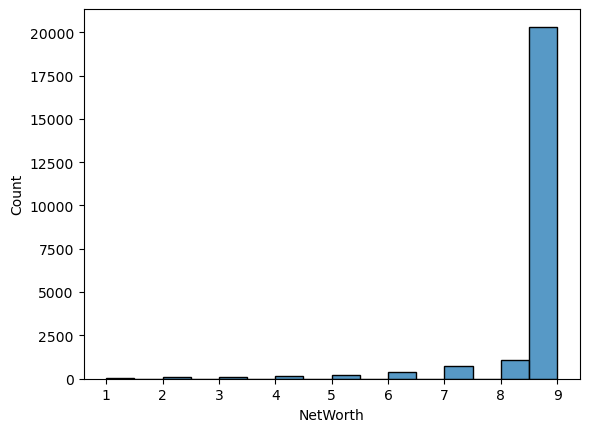

In [136]:
sns.histplot(consumer_df_new_1['NetWorth'])

In [137]:
consumer_df_new_1['NetWorth'].value_counts()

9.0    20320
8.0     1096
7.0      750
6.0      375
5.0      239
4.0      177
2.0       91
3.0       85
1.0       54
Name: NetWorth, dtype: int64

C:\Users\johnf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Health', ylabel='count'>

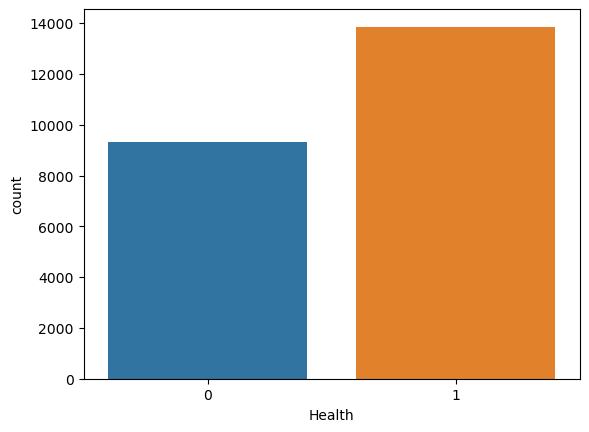

In [141]:
sns.countplot(consumer_df_new_1['Health'])

C:\Users\johnf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='NetWorth'>

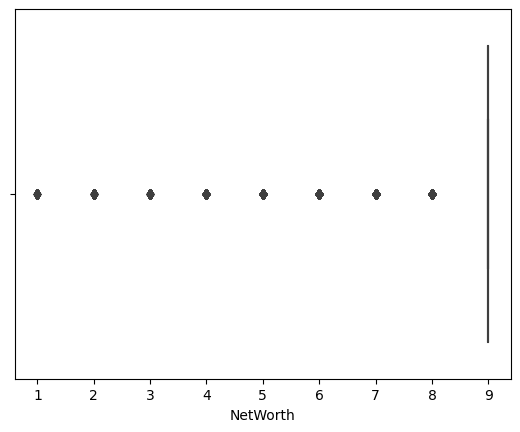

In [142]:
sns.boxplot(consumer_df_new_1['NetWorth'])